# "Will the SP-500 fall to index X by date Y"
> "Awesome summary"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Tassilo Neubauer
- categories: [prediction, python]


So I occasionally try to make predictions on the [forecasting Site Almanis](https://app.dysruptlabs.com) and some of their questions that reocurr every month are of the format: By X (DATE), will the S&P 500 fall below Index? (give concrete instead of general example?)





This notebook gives an answer to the question: What is the probability that the S&P 500 will exceed the index X within the next n days?

For example what is the probability that the 
Of course this probability can't be taken to be exact. To be precise, I looked at how 

This was useful for betting on questions on the betting Platform Almanis. Since the site asks those questions every month, I started to do this little analysis.

First of all: I do not provide any financial advice here. This is just a short blogpost about a forecast I made recently

So I occasionally try to make predictions on the [forecasting Site Almanis](https://app.dysruptlabs.com). Some monthly recurring questions there are of the format: By date_X, will the S&P 500 fall below Index_Y? 

To get a baseline for my predictions I made this notebook. The main reason why I publish this on my blog now, is that I want to get better at documenting and explaining it to others.

So let's get started! To make this example more concrete we will ask the question: "Will the S&P 500 go above 3900 by febuary 12th 2021?"

When you want to make predictions, it is a good idea to look for how often something has occured in the past. When it comes to an index like the S&P 500 it makes sense to make some kind of statistical model to inform your forecast, because this will outperform any any forecast you are able to make with your intuition (here is a link to some sources I highly reccomend, if you want to learn more about forecasting). 

So first a bit about markets: If you are a layperson like me, you should not expect to find any investing strategy to reliably earn money from the market through active investing. There are some caveates to this, but this is not what I am here to explain, so I'll just give you an example of what I mean: You should not believe any model you make that predicts that the S&P will go up or down tomorrow with a probability of 90% (which is enough confidence to make money by buing and selling the index fund). You should be pretty "humble" in this case because there are bunch of firms employing people smarter and more knowlegdable about finance than you that are rewarded with any exploitable strategy they can find with a heap of money. This property is what people mean when they say a market is efficient. 
This is why we will assume for this model that the S&P 500 is a random walk, which means that daily pricechanges are independent of each other (Because any dependency in the price would be "Free money" that no one bothered to pick up which is unlikely"). This is not entirely true. But is good enough for the rough model we are aiming for here.
Because changes in a random walk are independent of each other means that the only information that we have about the future index is where the index stands right now.
So when we want to answer the question whether the S&P 500 will exceed a certain index, we will look at the difference between the current index (3824,7) and the index that we want to know probability of exceedance of (3900).

For example what is the probability that the 
Of course this probability can't be taken to be exact. To be precise, I looked at how 

This was useful for betting on questions on the betting Platform Almanis. Since the site asks those questions every month, I started to do this little analysis.

So first we import some standard libraries for data analysis

If you want to look at this yourself, you can download the data here from X and here is my notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("^GspC.csv")


In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23362,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
23363,2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
23364,2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
23365,2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000
23366,2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000


In [4]:
sp = df.Close

In [5]:
sp.head()

0    17.660000
1    17.760000
2    17.719999
3    17.549999
4    17.660000
Name: Close, dtype: float64

<AxesSubplot:>

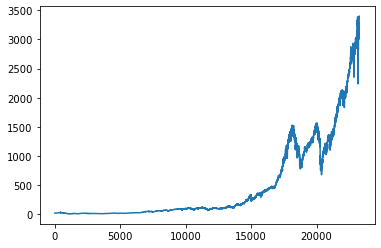

In [16]:
sns.lineplot(x=sp.index, y=sp.values)

As you can see from 

<AxesSubplot:>

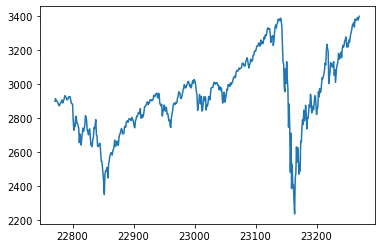

In [96]:
sns.lineplot(x=sp.index[-500:], y=sp.values[-500:])

Now we also use the index collumn from our initial dataframe.

In [6]:
sp.index = pd.to_datetime(df.Date)

In [7]:
sp.head()

Date
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
1928-01-05    17.549999
1928-01-06    17.660000
Name: Close, dtype: float64

In [8]:
def shift_n_absolute(ts, n):
    ts_shift = []
    for i in range(1,n+1):
        ts_shift.append((ts - ts.shift(periods=i))/ts)
    return ts_shift

def shift_n_absolute(ts, n):
    ts_shift = []
    for i in range(1,n+1):
        ts_shift.append((ts - ts.shift(periods=i)))
    return ts_shift

<AxesSubplot:xlabel='Date'>

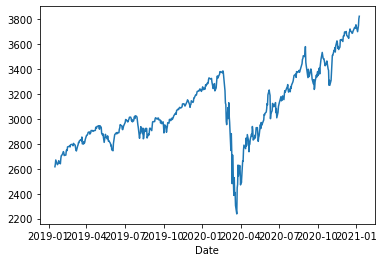

In [9]:
sns.lineplot(x=sp.index[-500:], y = sp.values[-500:])

In [10]:
n = 15 # the number of days that the S&P has to stay within the boundary
boundary = 3400
#sp = sp[:-1] #remove close

In [11]:
sp_shift = shift_n_absolute(sp, n)
shift_index = [str(x) for x in range(1,n+1)]
sp_shift = pd.DataFrame.from_dict(dict(zip(shift_index,sp_shift)))
sp_shift = sp_shift[n:]

In [12]:
sp_shift

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Date,,,,,,,,,,,,,,,
1928-01-23,0.159999,0.260000,0.379999,0.340000,0.349998,0.059999,0.170000,0.289999,0.269998,0.139999,-0.020001,0.090000,-0.080000,-0.120001,-0.020001
1928-01-24,0.070000,0.229999,0.330000,0.449999,0.410000,0.419998,0.129999,0.240000,0.359999,0.339998,0.209999,0.049999,0.160000,-0.010000,-0.050001
1928-01-25,-0.189999,-0.119999,0.040000,0.140001,0.260000,0.220001,0.229999,-0.060000,0.050001,0.170000,0.149999,0.020000,-0.140000,-0.029999,-0.199999
1928-01-26,0.109999,-0.080000,-0.010000,0.149999,0.250000,0.369999,0.330000,0.339998,0.049999,0.160000,0.279999,0.259998,0.129999,-0.030001,0.080000
1928-01-27,0.060002,0.170001,-0.019998,0.050002,0.210001,0.310002,0.430001,0.390002,0.400000,0.110001,0.220002,0.340001,0.320000,0.190001,0.030001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,-55.420166,-31.390137,-26.390137,-34.710205,-2.410157,10.639892,13.389892,5.729980,-8.760010,-21.830078,-0.520020,6.029785,53.159912,37.189941,32.549804
2021-01-05,26.210205,-29.209961,-5.179932,-0.179932,-8.500000,23.800048,36.850097,39.600097,31.940185,17.450195,4.380127,25.690185,32.239990,79.370117,63.400146
2021-01-06,21.279786,47.489991,-7.930175,16.099854,21.099854,12.779786,45.079834,58.129883,60.879883,53.219971,38.729981,25.659913,46.969971,53.519776,100.649903


<AxesSubplot:xlabel='Date'>

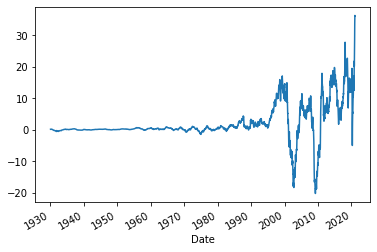

In [13]:
sp_shift["15"].rolling(window=500).mean().plot()

In [14]:
sp[-5:]

Date
2021-01-04    3700.649902
2021-01-05    3726.860107
2021-01-06    3748.139893
2021-01-07    3803.790039
2021-01-08    3824.679932
Name: Close, dtype: float64

In [15]:
sp_pre_forecast = float(sp[-1:]) + sp_shift * float(sp[-1:])

In [16]:
# "windows" is the number of days we look back in time how values
# were excedet in the past

#windows = 350
sp_forecast = sp_pre_forecast

In [17]:
float(sp[-1:])

3824.679932

probability of going below boundary
0.72931654676259


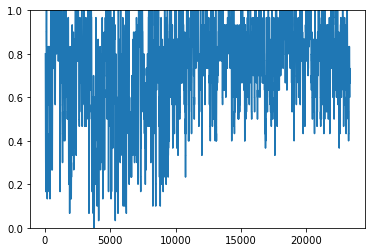

In [18]:
#computing the probability of exceeding "boundry"

win = []
if float(sp[-1:]) < boundary:
    print("probability of going above boundary")
    for i in range(len(sp_forecast)):
        win.append(any(sp_forecast.iloc[i] > boundary)) 
else:
    print("probability of going below boundary")
    for i in range(len(sp_forecast)):
        win.append(any(sp_forecast.iloc[i] < boundary))
win = pd.Series(win)
print(win.mean())
win.rolling(window=30).mean().plot()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()